# TD 2

In [1]:
%matplotlib widget
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import poisson

## Exercise 1

### 2. Sampling algorithm

Here we implement the algorithm determined for Question 1. 

In [2]:
def sample(pdf, n_samples):
    """
    Samples n_samples samples from the probability density distribution pdf

    k is computed using binary search on the cdf.
    Ad the cdf is by definition an increasing array, we can apply binary search, ensuring a O(log n)) complexity (insteaf of O(n))
    """
    u = np.random.uniform(size=n_samples)
    cdf = pdf.cumsum() # integral of the pdf
    k = np.searchsorted(cdf, u, side='right') - 1 # binary search
    return k

### 3. Testing the implementation

To test our implementation, we to sample $(X_i)_{1\leq i \leq N}$ from a Poisson distribution with parameter $lambda$ (`lamb`).

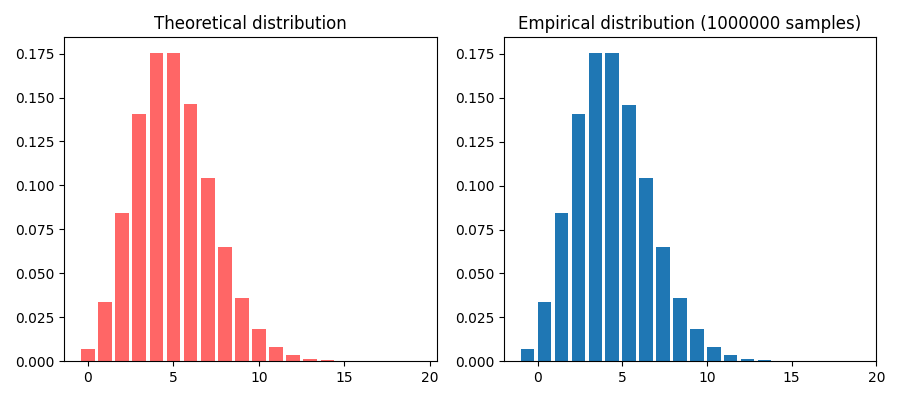

In [4]:
# We compute the poisson pdf on n points
N = 20
lamb = 5. # mean of the rv

x = np.arange(N)
pdf = poisson.pmf(x, lamb)

n_samples = 1_000_000
X = sample(pdf, n_samples)

fig, ax = plt.subplots(1,2, figsize=(9,4))
ax[0].set_title('Theoretical distribution')
ax[0].bar(range(N), pdf, color='red', alpha=0.6)

ax[1].set_title(f'Empirical distribution ({n_samples} samples)')
ax[1].hist(X, density=True, bins=N, width=0.8)

plt.tight_layout()
plt.show()

## Exercise 2